In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("IceCreamData.csv")

In [5]:
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


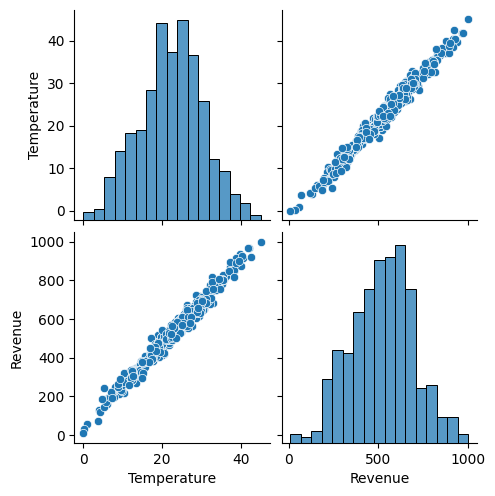

In [7]:
sns.pairplot(df)


In [8]:
df.corr()


,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


<Axes: >

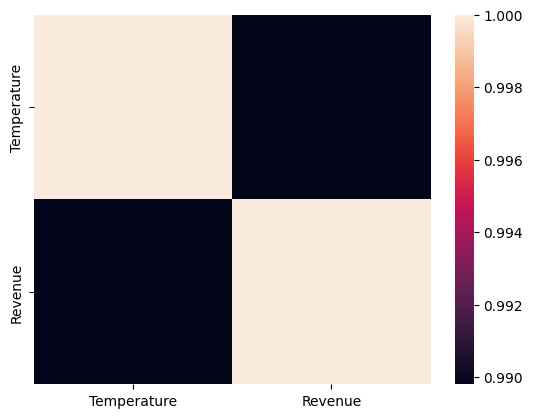

In [9]:
sns.heatmap(df.corr())

In [10]:
X = df.drop(['Revenue'],axis=1)
y = df['Revenue']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=12345,test_size=0.3,shuffle=True)

In [12]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [14]:
mae = mean_absolute_error(y_test, model.predict(X_test))
mae

20.272160081531286

In [15]:
mse = mean_squared_error(y_test, model.predict(X_test))
mse

647.6243435306244

In [16]:
rmse = root_mean_squared_error(y_test, model.predict(X_test))
rmse

25.448464463118878

In [17]:
r2 = r2_score(y_test,model.predict(X_test))
r2

0.9786464460028783

In [18]:
model.intercept_

46.882631561049664

In [19]:
model.coef_

array([21.37475972])

In [20]:
model.predict(X)

array([ 571.99388299,  602.73734374,  640.8990431 ,  487.10296951,
        292.7671295 ,  353.66416705,  339.88313272,  705.95164644,
         67.76299285,  723.80982727,  291.73592003,  125.2140632 ,
        448.98085001,  338.10323596,  892.03868538,  441.955329  ,
        601.2450433 ,  955.63653455,  679.35066863,  512.33828742,
        591.03776684,  372.09039708,  530.36507043,  394.40888065,
        557.34876032,  452.53923921,  381.64266776,  670.70594823,
        453.52911865,  797.56742932,  563.80847946,  372.44566055,
        234.7871355 ,  436.61349547,  808.4423417 ,  838.97869728,
        523.20954001,  421.30587858,  725.27303687,  411.31667618,
        538.57667727,  234.03049316,  448.20139909,  348.47324553,
        445.1780415 ,  381.96376603,  494.63924852,  701.70495962,
        484.50078638,  714.39475647,  183.54931037,  627.9727946 ,
        658.92178905,  645.35928428,  267.60672307,  630.6874126 ,
        757.28714073,  828.53867896,  313.27492191,  354.24519

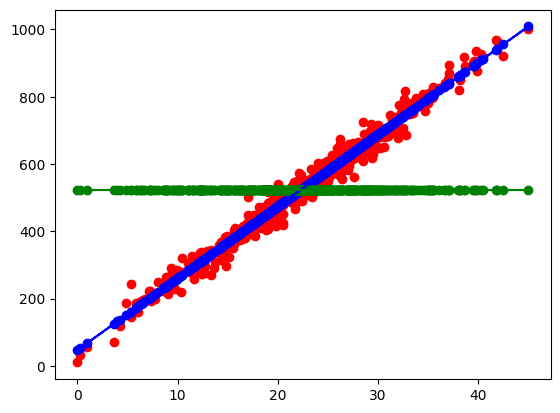

In [21]:
plt.scatter(df['Temperature'],df['Revenue'],color ='red')
plt.plot(df['Temperature'],model.predict(X),color='blue')
plt.scatter(df['Temperature'],model.predict(X),color='blue')

mean_arr = np.ones(y.size) *  y.mean()
plt.scatter(df['Temperature'],mean_arr,color='green')
plt.plot(df['Temperature'],mean_arr,color='green')